In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

## dataset lineare 

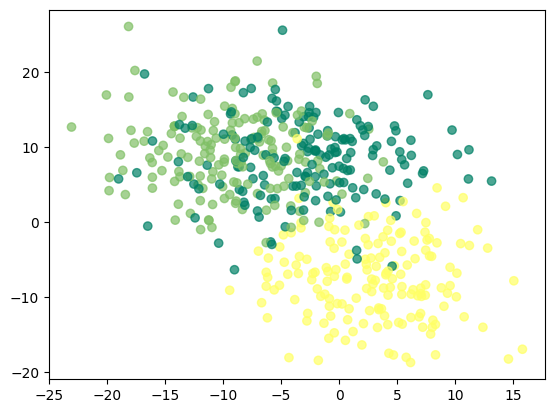

In [54]:
X, y = make_blobs(n_samples=500, centers=3, n_features=10, random_state=42)

X_noisy = X + np.random.normal(scale=5, size=X.shape)

plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y, cmap='summer', alpha=0.7)
plt.show()

In [55]:
df1 = pd.DataFrame(X) 

In [56]:
df1['target'] = y

In [57]:
df1

,0,1,2,3,4,5,6,7,8,9,target
0,-0.447694,10.222652,5.663941,2.565697,-6.101266,-7.431295,-9.656527,7.320148,1.852116,3.708224,0
1,-10.769123,10.512519,7.364234,-5.035032,-5.925025,-6.312293,-3.242294,1.086943,-1.715140,-4.749019,1
2,-8.546585,9.981741,6.519336,-5.173361,-7.070393,-5.476354,-2.265674,1.565739,-2.090702,-3.814000,1
3,-2.253168,9.996977,6.305353,2.987540,-8.720501,-8.159687,-9.463146,7.349614,2.539959,3.435708,0
4,-8.740136,8.165674,7.201153,-5.127587,-7.060272,-5.749883,-3.654713,-0.043713,-2.369654,-6.138043,1
...,...,...,...,...,...,...,...,...,...,...,...
495,0.844322,-7.244673,-5.773820,-2.902145,-1.127216,6.330133,-5.960960,0.908096,2.551732,-6.916063,2
496,-9.087644,9.447971,6.655916,-6.413539,-5.664672,-5.910937,-3.423136,-0.030906,-3.514443,-3.078264,1
497,-10.487094,8.067883,6.459732,-4.831568,-6.491050,-4.820755,-5.366331,0.483040,-2.613493,-3.811785,1
498,-3.037814,9.600650,5.878162,1.994441,-6.570794,-5.177895,-8.597575,9.925206,2.587810,2.400689,0


## dataset non lineari

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.831039  -0.258749  -0.628964   0.042424  -0.075947   0.296313   
1   1.185064   0.920387   0.143216   1.226603  -0.094349  -0.494819   
2   1.164022  -0.455526  -0.464717   0.081081  -0.107014   0.723692   
3  -0.023656   1.086288   0.443769  -0.057091  -0.570206  -0.150044   
4   0.480503   1.509424   0.372362   0.670457   0.095194   0.310618   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  Target  
0   0.577631   0.266443  -0.178108    0.777120    0.004353    0.212740       1  
1  -0.042812  -0.417796  -0.662322    0.098957   -0.607737   -0.556846       0  
2  -0.498244  -0.301871   0.717226    0.303586    0.743967   -1.185134       1  
3   0.377801   0.147599   0.076175    0.410466   -0.371633   -1.067261       0  
4   0.597867  -0.259937   0.311853   -0.157306    0.354320   -0.334511       0  


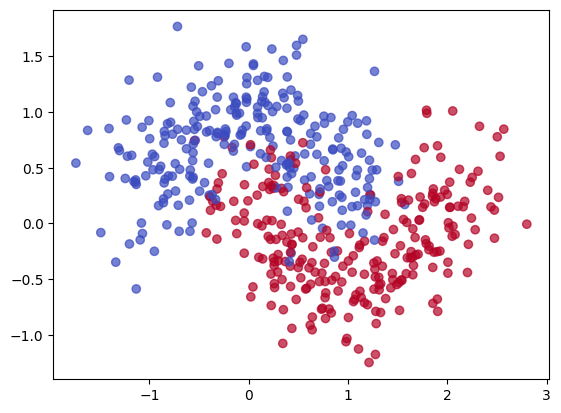

In [65]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))  
X_extended = np.hstack((X, extra_features))

df2 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df2["Target"] = y

print(df2.head())  

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.469004   0.323509   0.690756  -0.704591   0.700992  -0.729955   
1   0.125867   1.048157  -0.421501  -0.256275  -0.092920   0.638547   
2  -0.386288   0.042201   0.193508   0.066346  -0.192886  -0.063600   
3  -0.494481  -0.578267   0.658932  -0.021440   0.000170  -0.446975   
4  -0.714102   0.865415   0.630487   0.205375  -0.125017   0.019849   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  Target  
0  -0.213456  -0.639949  -0.433005   -0.585243    0.347263    0.202384       1  
1  -0.023143  -0.062983  -0.297509    0.776022    1.178870    0.235579       0  
2   0.421040  -0.176788  -0.268416   -0.100965   -0.006879    0.751329       1  
3  -0.321451   0.008174  -0.480141    0.493805   -0.368917   -0.733464       0  
4   0.309257   0.657303  -0.948206   -0.562043   -0.355465   -0.037076       0  


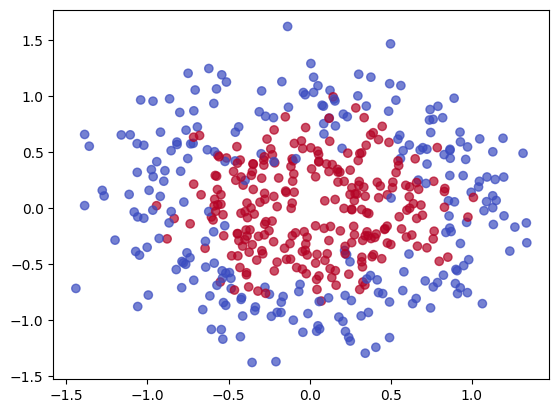

In [70]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df["Target"] = y

print(df.head())  
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()